In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats as sm
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

from scipy.stats import norm, kstest, wilcoxon
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/BDAlex/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Тест 1
В файле test_1 лежит результат теста. target - какая-то целевая метрика. Изучите результаты теста и сделайте вывод (проверяем гипотезу о равенстве средних). В качестве решения - ноутбук, в котором построено распределение параметра target в группах и проверены нужные критерии.

In [2]:
test_1 = pd.read_csv('test_1.csv')
test_1.head()

,group,client_id,target
0,test,1,48.294046
1,test,2,50.561098
2,test,3,50.987911
3,test,4,47.819840
4,test,5,50.153417


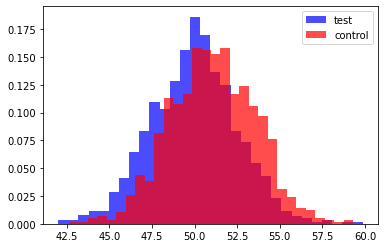

control len: 988 
test len: 1010


In [3]:
# Посмотрим на распределение целевой метрики в двух группах
test = test_1[test_1['group'] == 'test']['target']
control = test_1[test_1['group'] == 'control']['target']

plt.hist(test, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(control, bins=30, density=True, color='red', alpha=0.7)
plt.legend(["test", "control"])
plt.show()

# Посчитаем на размеры выборок
print('control len:', len(control), '\ntest len:', len(test))

In [4]:
# Проверим распределения на нормальность с помощью критерия Колмогорова-Смирнова
print(kstest(test, "norm"))
print(kstest(control, "norm"))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


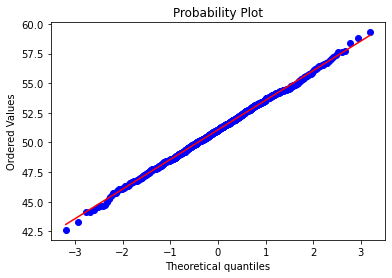

In [5]:
# Проверим распределения на нормальность с помощью QQ-plot
res = st.probplot(control, dist="norm", plot=pylab)
plt.show()

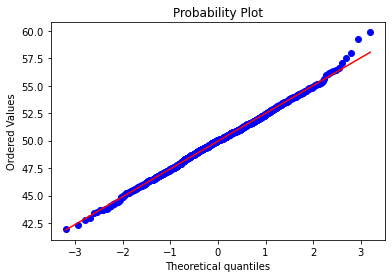

In [6]:
res = st.probplot(test, dist="norm", plot=pylab)
plt.show()

In [7]:
# Посчитаем средние
mu_t = test.mean()
mu_c = control.mean()
print('control mean:', mu_c, '\ntest mean:', mu_t)

control mean: 51.06737874869835 
test mean: 49.958943954077576


In [8]:
# Проверим гипотезу о равенстве средних с помощью t-критерия, т.к. нам неизвестны дисперсии
st.ttest_ind(test, control, equal_var = False)

Ttest_indResult(statistic=-9.879422047254666, pvalue=1.6631546220432403e-22)

**Вывод:** отвергаем нулевую гипотезу о равенстве средних на уровне значимости 5% (p-value << 0.05).

## Тест 2
В файле test_2 лежит результат теста, который был нацелен на увеличение суммы чека клиента. Изучите результаты теста и сделайте вывод , увеличилась сумма чека или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

In [9]:
test_2 = pd.read_csv('test_2.csv')
test_2.head()

,group,client_id,avg_sum
0,test,1,156.686451
1,test,2,342.625859
2,test,3,79.712120
3,test,4,493.110807
4,test,5,124.135016


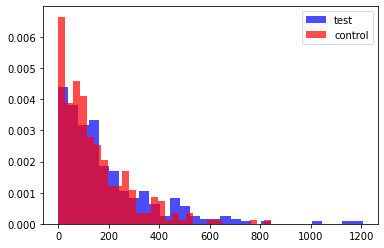

control len: 294 
test len: 306


In [10]:
# Посмотрим на распределение суммы чека в двух группах - распределение скошено влево, данные распределены не нормально
test2 = test_2[test_2['group'] == 'test']['avg_sum']
control2 = test_2[test_2['group'] == 'control']['avg_sum']

plt.hist(test2, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(control2, bins=30, density=True, color='red', alpha=0.7)
plt.legend(["test", "control"])
plt.show()

# Посчитаем на размеры выборок
print('control len:', len(control2), '\ntest len:', len(test2))

In [11]:
# Посчитаем средние
print('control mean:', control2.mean(), '\ntest mean:', test2.mean())

control mean: 144.81033169450896 
test mean: 189.85564910740237


In [12]:
# Проверим гипотезу о равенстве средних с помощью u-критерия
st.ranksums(control2, test2)

RanksumsResult(statistic=-2.808265278778519, pvalue=0.004980917764009625)

**Вывод:** отвергаем нулевую гипотезу на уровне значимости 5% (p-value < 0.05). Сумма чека в тестовой группе значимо увеличилась.

## Тест 3
В файле test_3 лежит результат теста рассылки email, целевая метрика - конверсия в переход на сайт с этого email. Изучите результаты теста и сделайте вывод , увеличилась конверсия или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

In [13]:
from scipy.stats import uniform, binom, norm

In [14]:
test_3 = pd.read_csv('test_3.csv')
test_3.head()

,group,client_id,click_flg
0,test,1,1
1,test,2,0
2,test,3,0
3,test,4,1
4,test,5,1


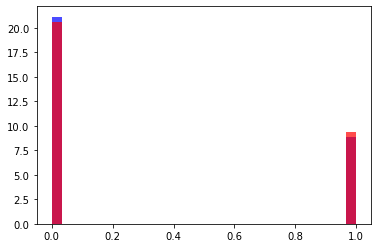

control len: 10010 
test len: 1010


In [15]:
# Посмотрим на распределение кликов в двух группах
test3 = test_3[test_3['group'] == 'test']['click_flg']
control3 = test_3[test_3['group'] == 'control']['click_flg']

plt.hist(test3, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(control3, bins=30, density=True, color='red', alpha=0.7)
plt.show()

# Посчитаем на размеры выборок
print('control len:', len(control3), '\ntest len:', len(test))

In [16]:
# Посчитаем и выведем конверсии в двух группах
test_click = test_3[test_3['group'] == 'test']['click_flg'].sum()
control_click = test_3[test_3['group'] == 'control']['click_flg'].sum()

test_users = test_3[test_3['group'] == 'test']['click_flg'].count()
control_users = test_3[test_3['group'] == 'control']['click_flg'].count()

test_cr =  test_click / test_users
control_cr = control_click / control_users
print('control CR:', control_cr, '\ntest CR:', test_cr)

control CR: 0.31238761238761237 
test CR: 0.2955203033024045


In [17]:
# Проверим гипотезу о равенстве долей по формуле z-критерия для долей
P = (test_cr*test_users + control_cr*control_users)/(test_users + control_users)
Z = (test_cr - control_cr)/np.sqrt(P*(1 - P)*(1/test_users + 1/control_users))
p_value = (1 - norm.cdf(abs(Z)))*2
p_value

0.009454050012441595

In [18]:
# Проверим гипотезу о равенстве долей с помощью prop.test
stat, pval = proportions_ztest([test_click, control_click], 
                                [test_users, control_users]) 
print("test statistic =", stat)
print("p-value =", pval)

test statistic = -2.595183244634136
p-value = 0.009454050012441642


**Вывод:** отвергаем нулевую гипотезу на уровне значимости 5% (p-value < 0.05). В тестовой группе CR меньше и по результатам эксперимента значимо упала.

# Задание 4
Покажите зависимость Мощности от Размера выборки двухвыборочного z-теста при размере эффекта (effect_size) 0.1, 0.5, 1 и при уровне значимости 0,05. Требуется предоставить ноутбук, который выводит 3 графика

In [19]:
from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

In [20]:
alpha = 0.05
effect_size_list = [0.1, 0.5, 1]

In [21]:
def relation(alpha, effect_size):
    powers = []
    sample_sizes = []
    
    for i in tqdm(range(50,2000)):
        powers.append(smp.zt_ind_solve_power(effect_size=effect_size, nobs1=i, alpha=alpha, alternative='two-sided'))
        sample_sizes.append(i)
    return powers, sample_sizes


effect_size =  0.1


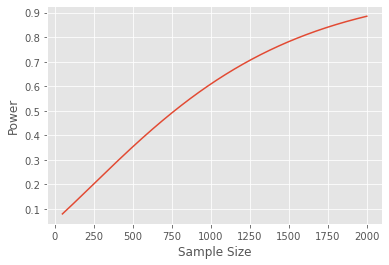

In [22]:
powers_01, sample_sizes_01 = relation(alpha, effect_size_list[0])

viz = sns.lineplot(x=sample_sizes_01, y=powers_01)
viz.set_xlabel("Sample Size")
viz.set_ylabel("Power");

print('effect_size = ', effect_size_list[0])


effect_size =  0.5


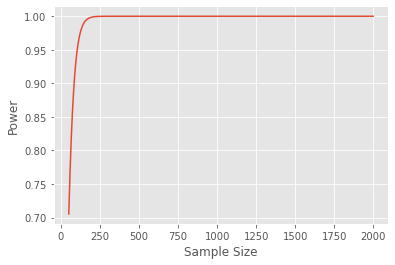

In [23]:
powers_05, sample_sizes_05 = relation(alpha, effect_size_list[1])

viz = sns.lineplot(x=sample_sizes_05, y=powers_05)
viz.set_xlabel("Sample Size")
viz.set_ylabel("Power");

print('effect_size = ', effect_size_list[1])


effect_size =  1


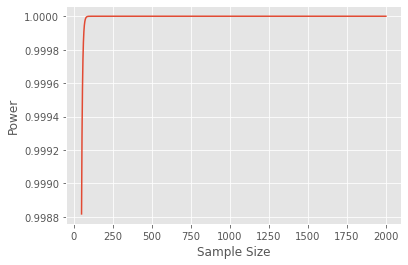

In [24]:
powers_1, sample_sizes_1 = relation(alpha, effect_size_list[2])

viz = sns.lineplot(x=sample_sizes_1, y=powers_1)
viz.set_xlabel("Sample Size")
viz.set_ylabel("Power");

print('effect_size = ', effect_size_list[2])